In [1]:
import numpy as np
n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
from sklearn.utils import check_random_state
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

### 1.a)

Registros con y1
520
Registros con y2
480


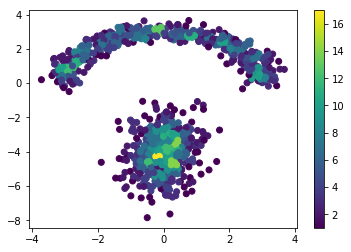

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)


print("Registros con y1")
print( len(y1) )
print("Registros con y2")
print( len(y2) )


equis=X[:,0]
ii=X[:,1]

hist, xedges, yedges = np.histogram2d(equis, ii,30)
xidx = np.clip(np.digitize(equis, xedges) - 1, 0, hist.shape[0] - 1)
yidx = np.clip(np.digitize(ii, yedges) - 1, 0, hist.shape[1] - 1)
c = hist[xidx, yidx]
plt.scatter(equis, ii, c=c)

plt.colorbar()
plt.show()


In [3]:
import matplotlib.pyplot as plt
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

### 1.b)

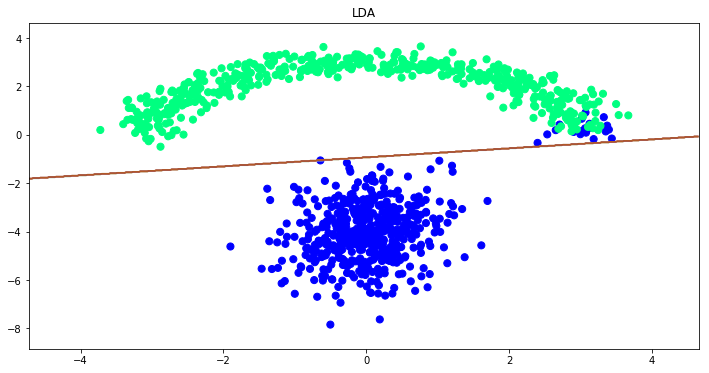

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_LDA = LDA()
model_LDA.fit(X,y)
visualize_border(model_LDA,X,y,"LDA")

<p>Se puede observar la frontera que separa las calses. Ademas, la frontera se inclina hacia un lado debido a los datos que se les hizo el shifteo.</p>

### 1.c)

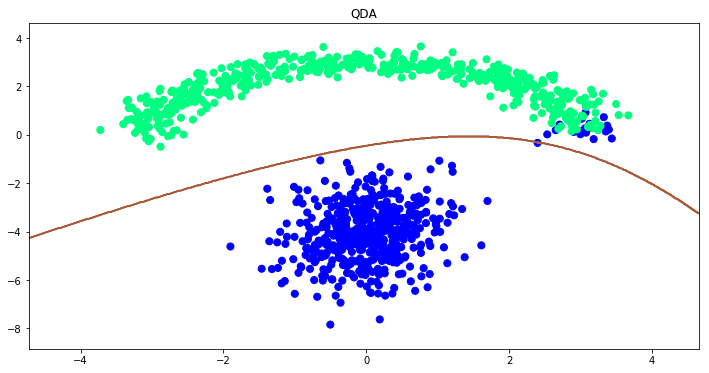

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model_QDA = QDA()
model_QDA.fit(X,y)
visualize_border(model_QDA,X,y,"QDA")

<p>Se puede ver que QDA, a diferencia de LDA, permite crear una curva en vez de una recta como frontera, aunque, de la misma forma que LDA, sufre una "atraccion" hacia los datos shifteados para generar ruido.</p>

### 1.d)

In [6]:
from sklearn.metrics import accuracy_score
y_true = y
y_pred_LDA = model_LDA.predict(X)
y_pred_QDA = model_QDA.predict(X)
print("Miss Classification Loss: %f"%(1-accuracy_score(y_true, y_pred_LDA)))
print("Miss Classification Loss: %f"%(1-accuracy_score(y_true, y_pred_QDA)))

Miss Classification Loss: 0.020000
Miss Classification Loss: 0.019000


<p>Se puede ver que el modelo LDA tiene mayor error de entrenamiento que el modelo QDA.</p>

### 1.e)

In [7]:
from ipywidgets import interactive
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)

from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model=LR() #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

<p>Parametro c en model.set_param</p>

<p>C: Inversa de la fuerza de regularizacion Tiene que ser flotante. Como en SVM, valores pequeños indican regularizacion mas fuerte.</p>

<p>Una regularizacion mas debil hace que la frontera se vea "atraida" hacia los valores ruidos, mientras que una mas fuerte ignora este ruido, haciendo que la frontera quede en un estado mas vertical.
Hay que recordar que la frontera determinada por RL depende de todos los datos, por lo que remover datos del conjunto de entrenamiento podria afectar de gran manera la frontera.</p>

### 1.f)

In [8]:
### from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

<p>Se comporta de forma similar a regresion logistica.</p>
<p>Hay que recordar que SVM determina la frontera en base a los puntos que estan mas cerca del margen, por lo que se podrian remover datos del conjunto de entrenamiento sin alterar la frontera.</p>

### 1.g)

In [9]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf') #try poly
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 0.5 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

<p>Se puede ver que un C grande intentara rodear a los puntos de la clase 1 mientras que un C bajo intentara rodear a los puintos de clase 0.</p>
<p>El parametro C define la complejidad de la frontera: un C bajo hara la curva mas suave mientras que un C mas fuerte hara que la curva tenga mas libertad para tomar mas puntos como vectores de soporte, intentando clasificar todos los puntos como correctos.</p>
<p>El kernel RBF se define como:
$$\exp(-\gamma \|x-x'\|^2) \gamma$$
Con $\gamma$ siendo por defecto  $\frac{1}{n}$ donde $n$ es el numero de caracteristicas</p>

In [10]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='poly') #try poly
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

Se puede ver que a medida que aumenta C, la frontera intenta clasificar correctamente a los valores ruido, mientras que si C es pequeño, la frontera ignora estos valores.

### 1.h)

In [11]:
from sklearn.tree import DecisionTreeClassifier as Tree
def train_model(param):
    model = Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X,y)
    return model
p_min = 1 #define your range
p_max = 10 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

<p>Se puede ver que a medida que aumenta el valor del parametro, la cantidad de puntos azules que se clasifican correctamente aumenta. Esto debido a que la profundida del arbol aumenta, lo que hace que se pueda dividir el area en zonas mas pequeñas y con menos poblacion, por lo que la frontera se acomada de mejor forma al conjunto de prueba.</p>

### 1.i)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
def train_model(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X,y)
    return model
p_min = 1 #define your range
p_max = 10 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

<p>Se puede ver que a medida que aumenta el k, el ruido generado es ignorado, mientras que en valores bajos la frontera se ajusta de forma casi perfecta a estos valores. ESto debido a que el algoritmo funciona viendo los k-vecinos mas cercanos para determianr la clase del punto.</p>

## 2

In [13]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

### 2.a)

In [14]:
import pandas as pd
import numpy as np
df = pd.read_csv('./heartbeat-sounds/set_a.csv')

print ("Informacion:")
df.info()
print ("\nNumero de clases:")
print (df['label'].value_counts())
df.head()

Informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
dataset     176 non-null object
fname       176 non-null object
label       124 non-null object
sublabel    0 non-null float64
dtypes: float64(1), object(3)
memory usage: 5.6+ KB

Numero de clases:
artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64


,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


<p>Se logra apreciar que hay un total de 176 registros para ser analizados. Estos registros poseen la estructura <b>dataset</b> que corresponde a la letra asignada para el dataset (siendo el dataset "A" según lo solicitado), <b>fname</b> que corresponde al nombre de cada archivo de sonido a analizar, <b>label</b> que corresponde a la condición de salud que refleja el audio y <b>sublabel</b> que corresponde a información adicionada que podría existir en el archivo de audio (y que sólo se presenta en el dataset B). Hay 40 registros de la clase <i>artifact</i>, 34 de la clase <i>murmur</i>, 19 de la clase <i>extrahls</i> y hay 31 registros normales. Además, hay 52 registros que no poseen clasificación. 

### 2.b)

In [15]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux

new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='heartbeat-sounds/set_a/') #MODIFICAR EL PATH A LA CARPETA CON LOS AUDIOS
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))

new_df.head()

,file_name,time_series,len_series
0,artifact__201012172012.wav,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900
1,artifact__201105040918.wav,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900
2,artifact__201105041959.wav,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900
3,artifact__201105051017.wav,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900
4,artifact__201105060108.wav,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900


<p>Este paso es importante dado que se debe traducir la información de los archivos de sonido en algún formato con el que se pueda trabajar y así obtener la información necesaria para posteriormente entrenar los módelos. Para esto, tendrán que ser representados en una matriz donde se podrán aplicar las operaciones correspondientes. Es por lo anterior que se debe rellenar con ceros a aquellos archivos que poseen una duración menor e igualar el tamaño de los datos para que no existan elementos vacíos dentro de la matriz.</p>

### 2.c)

In [16]:
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
            1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0,
            2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,
            0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]
new_df['target'].value_counts()

normal/extrahls    66
artifact           58
murmur             52
Name: target, dtype: int64

<p>En estos momentos hay 58 registros de la clase <i>artifact</i>, 52 de la clase <i>murmur</i> y 66 de la clase <i>normal/extrahls</i> (que ahora se encuentran juntas), por lo que ahora todos los registros tienen una clasifación. Al tener etiquetas mal asignadas se altera el entrenamiento del modelo, el cual podría dar predicciones erradas dado que hay distintas concentraciones de datos para ciertas etiquetas en lugar de las esperadas. Un solo dato podría afectar dependiendo del modelo que se decida entrenar, ya que existen algunos que modificarán su curva existiendo un sólo dato alterado. Por otro lado, si la etiqueta que se coloque mal no pertenece al conjunto de posibles clasificaciones, se estaría dando un gran golpe al modelo ya que este podría situar sus margenes erroneamente, separando mal los datos. Esto provocaría incluso que el modelo no pueda predecir.</p>

### 2.d)

In [17]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)

new_df['target'].value_counts()

2    66
0    58
1    52
Name: target, dtype: int64

<p>Se aprecia que hay 58 registros de la etiqueta <b>0</b>, 52 de la etiqueta <b>1</b> y 66 de la etiqueta <b>2</b></p>

### 2.e)

In [18]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape
#y.shape

(176, 396900)

<p>Las dimensiones de la matriz indica que podría existir un problema por la maldición de la dimensionalidad, ya que se está trabajando con número de <b>396900</b> atributos. Es por lo anterior que la máquina podría reducir su performance en gran medida.</p>

### 2.f)

In [19]:
X_fourier = np.abs(np.fft.fft(X))
X_fourier.shape

(176, 396900)

<p>Ahora los datos plasman las frecuencias como atributos en lugar de tiempos. No hay cambios en las dimensiones de la matriz.</p> 

### 2.g)

In [20]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape

(176, 100000)

<p>Este paso reduce cerca de 4 veces la dimensionalidad de la matriz. Además, elimina el exceso de información ya que solo deja la informacíon asociado al período con el que late el corazón (dado por la transformada de fourier aplicada anteriormente, y que al ser una función periódica, sólo basta con conocer la información que se repite constantemente) y se ajusta para calzar con el tamaño dado. Esto se podría comprobar haciendo una expansión de la información mediante una reiteración del período hasta alcanzar el largo antiguo de la matriz, para posteriormente calcular el error asociado entre ambas. Con esta información se podría determinar si la información fue bien representada dependiendo del grado del error.</p>

### 2.h)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y,test_size=0.25, random_state=42)

print ("X de entrenamiento:" ,X_train.shape)
print ("y de entrenamiento: ", y_train.shape)
print ("X de pruebas: ",X_test.shape)
print ("y de pruebas: ",y_test.shape)


X de entrenamiento: (132, 100000)
y de entrenamiento:  (132,)
X de pruebas:  (44, 100000)
y de pruebas:  (44,)


<p>Finalmente se tienen 100000 clases y los conjuntos de entrenamiento y pruebas tienen un largo de 132 y 44 elementos respectivamente.</p>

### 2.i)

In [22]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

<p>Como se explicó anteriormente, es conveniente normalizar los datos por razones como conseguir una mejor distribución y una mayor significancia.</p>

### 2.j)

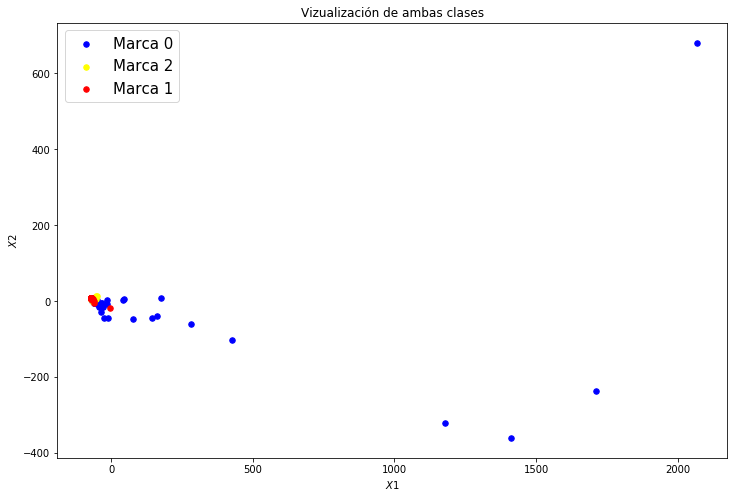

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

#=======================================#
plt.figure(figsize = (12, 8))
plt.scatter([X_pca_train[i,0] for i in range(len(y_train)) if y_train[i] == 0],[X_pca_train[i,1] for i in range(len(y_train)) if y_train[i] == 0], s=30, c = "blue")
plt.scatter([X_pca_train[i,0] for i in range(len(y_train)) if y_train[i] == 2],[X_pca_train[i,1] for i in range(len(y_train)) if y_train[i] == 2], s=30, c = "yellow")
plt.scatter([X_pca_train[i,0] for i in range(len(y_train)) if y_train[i] == 1],[X_pca_train[i,1] for i in range(len(y_train)) if y_train[i] == 1], s=30, c = "red")
plt.xlabel("$X1$")
plt.ylabel("$X2$")
plt.legend(['Marca 0', 'Marca 2', 'Marca 1'],prop={'size': 15})
plt.title("Vizualización de ambas clases")
plt.show()


<p>Se logra apreciar que los datos se encuentran muy agrupados cerca del origen, y que solo unos datos de la marca 0 se escapan de esta concentración. Para analizar mejor esto, se relizará un zoom al área que concentra los datos de las 3 marcas.</p>

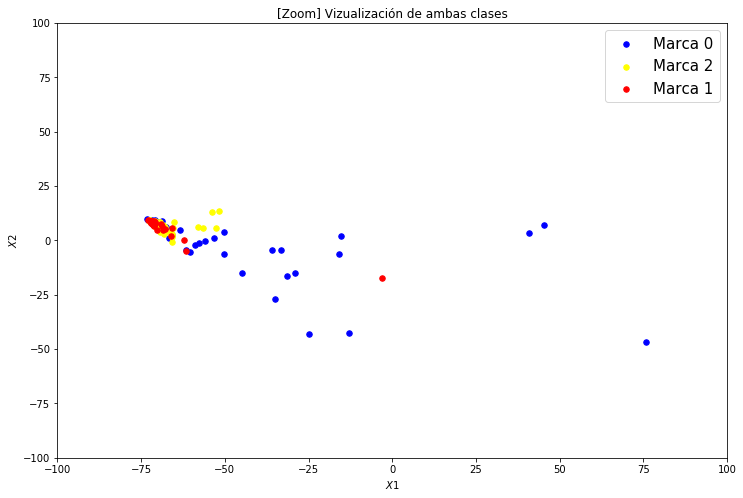

In [24]:
plt.figure(figsize = (12, 8))
plt.scatter([X_pca_train[i,0] for i in range(len(y_train)) if y_train[i] == 0],[X_pca_train[i,1] for i in range(len(y_train)) if y_train[i] == 0], s=30, c = "blue")
plt.scatter([X_pca_train[i,0] for i in range(len(y_train)) if y_train[i] == 2],[X_pca_train[i,1] for i in range(len(y_train)) if y_train[i] == 2], s=30, c = "yellow")
plt.scatter([X_pca_train[i,0] for i in range(len(y_train)) if y_train[i] == 1],[X_pca_train[i,1] for i in range(len(y_train)) if y_train[i] == 1], s=30, c = "red")
plt.xlabel("$X1$")
plt.ylabel("$X2$")
plt.legend(['Marca 0', 'Marca 2', 'Marca 1'],prop={'size': 15})
plt.title("[Zoom] Vizualización de ambas clases")
plt.axis([-100,100,-100,100])
plt.show()

<p>Ahora se logra apreciar en mejor medida las distintas concentraciones que delimitan el area de cada una. Hay que dejar en claro que esto solo se hizo para describir mejor los datos concentrados, pero que no se están eliminando aquellos datos que se escapan de esta gráfica.</p>

## 2.k)

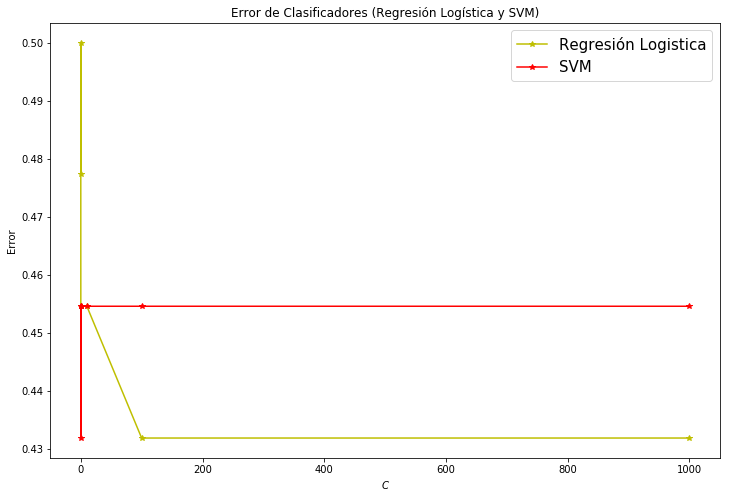

In [25]:
Cs = [0.0001,0.01,0.1,1,10,100,1000]
error_logistica=[]
error_svm=[]

for i in Cs:
    logistica = LR()
    logistica.set_params(C=1/i,penalty='l2') 
    logistica.fit(X_pca_train,y_train)

    y_pred = logistica.predict(X_pca_test)
    score1 = 1-accuracy_score(y_test, y_pred)
    error_logistica.append(score1)
    
for i in Cs:
    svm= SVM()
    svm.set_params(C=i,kernel='linear')
    svm.fit(X_pca_train,y_train)

    y_pred = svm.predict(X_pca_test)
    score2 = 1-accuracy_score(y_test, y_pred)
    error_svm.append(score2)

plt.figure(figsize = (12, 8))
plt.plot(Cs,error_logistica, "*y-")
plt.plot(Cs,error_svm, "*r-")

plt.legend(["Regresión Logistica", "SVM"], prop={'size': 15})

plt.title('Error de Clasificadores (Regresión Logística y SVM)')
plt.xlabel("$C$")
plt.ylabel("Error")

plt.show()

<p>Se logra observar que el error asociado a Regresión Logística llega a ser menor que el de SVM desde que el parámetro se comienza a acercar a 100. Para tener un mejor análisis, se hará una mejor vista de lo que sucede cerca de 0. </p>

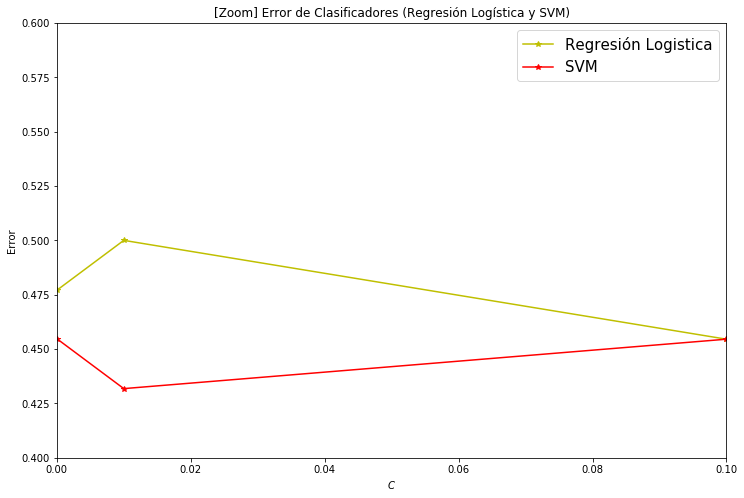

In [26]:
plt.figure(figsize = (12, 8))
plt.plot(Cs,error_logistica, "*y-")
plt.plot(Cs,error_svm, "*r-")

plt.legend(["Regresión Logistica", "SVM"], prop={'size': 15})

plt.title('[Zoom] Error de Clasificadores (Regresión Logística y SVM)')
plt.xlabel("$C$")
plt.ylabel("Error")
plt.axis([0,0.1,0.4,0.60])

plt.show()

<p>Luego de observar esta versión del gráfico, es posible establecer que Regresión Logística disminuye su error a medida que se aumenta el parámetro $c$, consiguiendo su mínimo a medida que se acerca al 100 en adelante. En cambio, SVM consigue su mínimo en el valor de 0.01, desde donde comienza a aumentar gradualmente para mantenerse constante desde el 0.1. Por lo tanto, ambos módelos se comportan de manera contraria para el mismo parámetro. </p>

## 2.l)

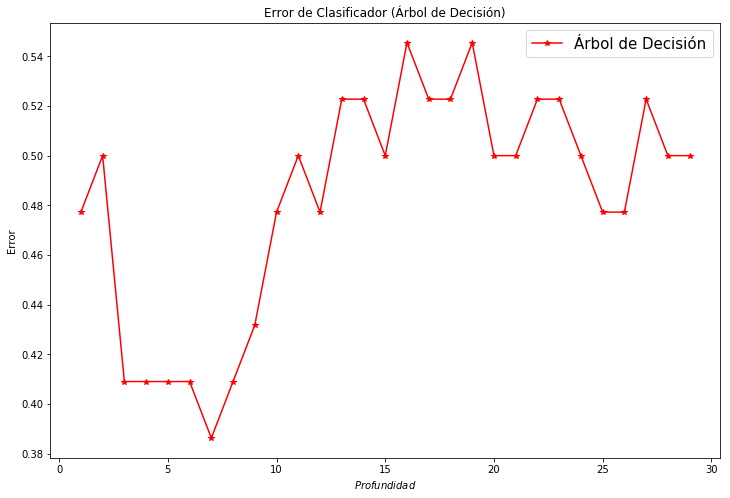

In [27]:
Depths = range(1,30)
error_tree=[]

for param in Depths:
    tree = Tree() #edit the train_model function
    tree.set_params(max_depth=param,criterion='gini',splitter='best')
    tree.fit(X_pca_train,y_train)
    
    y_pred = tree.predict(X_pca_test)
    score = 1-accuracy_score(y_test, y_pred)
    error_tree.append(score)

plt.figure(figsize = (12, 8))
plt.plot(Depths,error_tree, "*r-")

plt.legend(["Árbol de Decisión"], prop={'size': 15})

plt.title('Error de Clasificador (Árbol de Decisión)')
plt.xlabel("$Profundidad$")
plt.ylabel("Error")

plt.show()


<p>Se logra apreciar que el error de este modelo oscila en gran medida mientras se aumenta la profundidad del árbol. Sin embargo, hay un rango de valores en el cual este deja de oscilar pudiendo llegar al valor mínimo en la profundidad de <b>7</b>. El mínimo error de este modelo llega a ser menor que los mínimos errores de Regresión Logística y de SVM.</p>

## 2.m)

<p>Para la creación de la tabla se decidió usar los parámetros que minimizaron el error en cada modelo. Con lo anterior se decidió crear una tabla desde 2 a 10 dimensiones de atributos.</p>

In [28]:
dimensiones=range(2,11)
dic={'RL':[],'SVM':[],'TREE':[]}
for d in dimensiones:
    pca_model = PCA(n_components=d)
    pca_model.fit(X_train)
    X_pca_train = pca_model.transform(X_train)
    X_pca_test = pca_model.transform(X_test)
    
    logistica = LR()
    logistica.set_params(C=1/100,penalty='l2') 
    logistica.fit(X_pca_train,y_train)

    y_pred = logistica.predict(X_pca_test)
    score = 1-accuracy_score(y_test, y_pred)
    dic['RL'].append(score)
    
    svm= SVM()
    svm.set_params(C=0.01,kernel='linear')
    svm.fit(X_pca_train,y_train)

    y_pred = svm.predict(X_pca_test)
    score = 1-accuracy_score(y_test, y_pred)
    dic['SVM'].append(score)
    
    tree = Tree() #edit the train_model function
    tree.set_params(max_depth=7,criterion='gini',splitter='best')
    tree.fit(X_pca_train,y_train)
    
    y_pred = tree.predict(X_pca_test)
    score = 1-accuracy_score(y_test, y_pred)
    dic['TREE'].append(score)

df = pd.DataFrame(data=dic,index=np.arange(2,11))
df #Mostrar el dataframe

,RL,SVM,TREE
2,0.431818,0.431818,0.386364
3,0.431818,0.409091,0.431818
4,0.431818,0.409091,0.431818
5,0.409091,0.363636,0.295455
6,0.363636,0.272727,0.295455
7,0.454545,0.272727,0.295455
8,0.340909,0.272727,0.295455
9,0.340909,0.272727,0.318182
10,0.318182,0.295455,0.318182


<p>Analizando la tabla, se aprecia que el error logra disminuir para ciertas variaciones del número de dimensiones. Además, el mínimo error para todos los modelos se consigue (para la muestra seleccionada) en el valor de 8 dimensiones. Sin embargo, para Regresión Lineal, se logra a las 10 dimensiones.</p>
<p>Lo anterior se debe a que el tener más dimensiones, existen más posibilidades para definir fronteras que separan la agrupación de datos a analizar. Sin embargo, llega un punto en que la complejidad se vuelve excesiva, por lo que ataca nuevamente la <i>maldición de la dimensionalidad</i>.</p>

## 2.n)

C:\Users\Gabriel\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


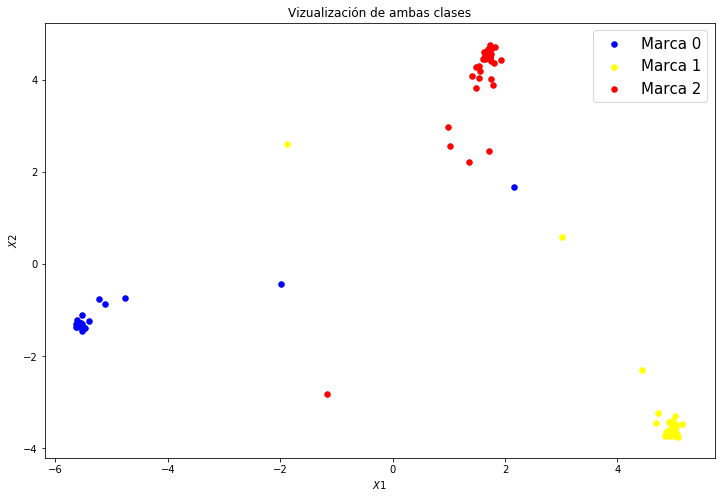

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_lda_train = model_lda.transform(X_train)
X_lda_test = model_lda.transform(X_test)

#=======================================#
plt.figure(figsize = (12, 8))
plt.scatter([X_lda_train[i,0] for i in range(len(y_train)) if y_train[i] == 0],[X_lda_train[i,1] for i in range(len(y_train)) if y_train[i] == 0], s=30, c = "blue")
plt.scatter([X_lda_train[i,0] for i in range(len(y_train)) if y_train[i] == 1],[X_lda_train[i,1] for i in range(len(y_train)) if y_train[i] == 1], s=30, c = "yellow")
plt.scatter([X_lda_train[i,0] for i in range(len(y_train)) if y_train[i] == 2],[X_lda_train[i,1] for i in range(len(y_train)) if y_train[i] == 2], s=30, c = "red")
plt.xlabel("$X1$")
plt.ylabel("$X2$")
plt.legend(['Marca 0', 'Marca 1', 'Marca 2'],prop={'size': 15})
plt.title("Vizualización de ambas clases")
plt.show()

<p>En el gráfico se logra apreciar que las concentraciones de datos se encuentras más separadas según las etiquetas, lo que debería mejorar la calidad de las fronteras del modelo utilizado para predecir.</p>
<p>El warning que surge está dado porque existen datos colineales, lo que significa que está mal condicionada. El método LDA necesita que la matriz esté bien condicionada ya que para los cálculos ejecuta inversiones de esta.</p>

## 2.o)

<p>Al comparar todas las representaciones con las que se habían creado previamente, se tiene que todas disminuyeron el error asociado respecto a los obtenidos por PCA. Lo anterior concuerda con lo que se explicó previamente sobre que las concentraciones de datos se encuentras más definidas y separadas, por lo que resulta más fácil definir las fronteras.</p>

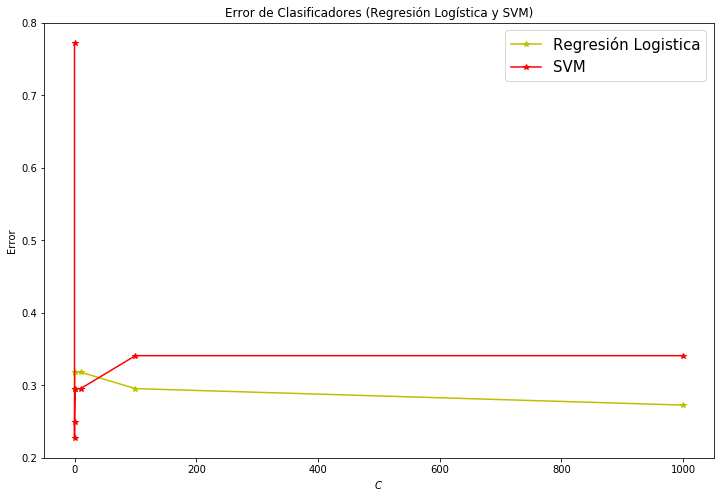

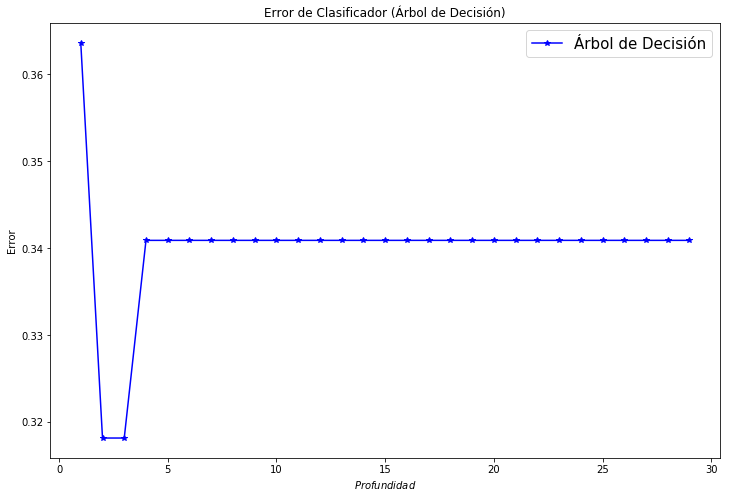

In [30]:
Cs = [0.0001,0.01,0.1,1,10,100,1000]
Depths = range(1,30)
error_logistica=[]
error_svm=[]
error_tree=[]

for i in Cs:
    logistica = LR()
    logistica.set_params(C=1/i,penalty='l2') 
    logistica.fit(X_lda_train,y_train)

    y_pred = logistica.predict(X_lda_test)
    score1 = 1-accuracy_score(y_test, y_pred)
    error_logistica.append(score1)

    svm= SVM()
    svm.set_params(C=i,kernel='linear')
    svm.fit(X_lda_train,y_train)

    y_pred = svm.predict(X_lda_test)
    score2 = 1-accuracy_score(y_test, y_pred)
    error_svm.append(score2)

for param in Depths:
    tree = Tree() #edit the train_model function
    tree.set_params(max_depth=param,criterion='gini',splitter='best')
    tree.fit(X_lda_train,y_train)
    
    y_pred = tree.predict(X_lda_test)
    score = 1-accuracy_score(y_test, y_pred)
    error_tree.append(score)

    
plt.figure(1, figsize = (12, 8))
plt.plot(Cs,error_logistica, "*y-")
plt.plot(Cs,error_svm, "*r-")
plt.title('Error de Clasificadores (Regresión Logística y SVM)')
plt.xlabel("$C$")
plt.ylabel("Error")
plt.legend(["Regresión Logistica", "SVM"], prop={'size': 15})


plt.figure(2, figsize = (12, 8))
plt.plot(Depths,error_tree, "*b-")
plt.legend(["Árbol de Decisión"], prop={'size': 15})

plt.title('Error de Clasificador (Árbol de Decisión)')
plt.xlabel("$Profundidad$")
plt.ylabel("Error")

plt.show()

## 2.p)

# AUXILIO

## 3

### 3.a)

           tweet_id
count  4.000000e+04
mean   1.845184e+09
std    1.188579e+08
min    1.693956e+09
25%    1.751431e+09
50%    1.855443e+09
75%    1.962781e+09
max    1.966441e+09
(40000, 4)
     tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhhh...waitin o...  
2                Funeral ceremony...gloomy friday...  
3               wants to hang out with friends SOON!  
4  @dannycastillo We want to trade with someone w...  


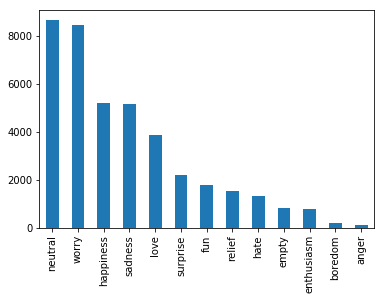

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('text_emotion.csv')
print(df.describe())
print(df.shape)
print(df.head())

df['sentiment'].value_counts().plot(kind='bar')
plt.show()

df['author'].value_counts().head()
df['sentiment'].value_counts()

### 3.b)

In [2]:
import numpy as np


msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

print(df_train.shape)


print(df_test.shape)

(32103, 4)
(7897, 4)


### 3.c)

In [3]:
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

pd.options.mode.chained_assignment = None


nltk.download('stopwords')

def normalizar( df ):
    nltk.download('wordnet')
    #definir lemmatizer
    lemmatizer = WordNetLemmatizer()

    ##hay varios algoritmos de stemmer. 
    # http://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization
    #from nltk.stem.porter import PorterStemmer
    #stemmer = PorterStemmer()

    #descargar y definir stop words
    
    stop = stopwords.words('english')

    #minusculas
    df['content'] = df['content'].str.lower()     

    #remover puntuacion
    df['content'] = df['content'].str.replace('[^\w\s]',' ')   

    #remove stopwords
    df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))  

    #stemming or lematize
    df['content'] = df['content'].apply(lambda x : filter(None,x.split(" ")))
    df['content'] = df['content'].apply(lambda x : [lemmatizer.lemmatize(y) for y in x]) #lematize
    #df['content'] = df['content'].apply(lambda x : [stemmer.stem(y) for y in x]) #stem
    df['content'] = df['content'].apply(lambda x : " ".join(x))
    return

normalizar(df_train)
normalizar(df_test)
df_train.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gabriel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gabriel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gabriel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,tiffanylue know listenin bad habit earlier sta...
1,1956967666,sadness,wannamama,layin n bed headache ughhhh waitin call
2,1956967696,sadness,coolfunky,funeral ceremony gloomy friday
3,1956967789,enthusiasm,czareaquino,want hang friend soon
4,1956968416,neutral,xkilljoyx,dannycastillo want trade someone houston ticke...


## 3.d)

In [4]:
traduccion = {"neutral":1, "worry":-1, "happiness":1, "sadness":-1
             ,"love":1, "surprise":1, "fun":1, "relief":1
             ,"hate":-1, "empty":-1, "enthusiasm":1, "boredom":-1
             ,"anger":-1}


df_train['binarySent']=df_train['sentiment'].replace(traduccion)
df_test['binarySent']=df_test['sentiment'].replace(traduccion)
print(df_train.head())
print(df_test.head())

     tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  binarySent  
0  tiffanylue know listenin bad habit earlier sta...          -1  
1            layin n bed headache ughhhh waitin call          -1  
2                     funeral ceremony gloomy friday          -1  
3                              want hang friend soon           1  
4  dannycastillo want trade someone houston ticke...           1  
      tweet_id sentiment           author  \
17  1956971206   sadness  brokenangel1982   
23  1956972270     worry        sweet8181   
24  1956972359   sadness   xamountoftruth   
25  1956972444     worry       jomama6881   
26  1956972557   sadness       LilithGaea   

                                              content  binarySent  
17    

## 3.e)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 10)
trainBag = vectorizer.fit_transform(df_train['content'])
testBag = vectorizer.transform(df_test['content'])
#(tweet,palabra)


## 3.f)

In [22]:
raw_data = {'tipo': ['Multi Naive', 'LDA', 'QDA', 'Reg', 'SVM', 'Tree'],
        'train_score': [],
        'test_score': []}

### Multinomial Naive Bayes

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

multibayes = MultinomialNB()
multibayes.fit(trainBag, df_train['binarySent'])

Res_train = multibayes.predict(trainBag)
Res_test = multibayes.predict(testBag)

scoreTrain = 1 - accuracy_score(df_train['binarySent'], Res_train)
scoreTest = 1 - accuracy_score(df_test['binarySent'], Res_test)

raw_data['train_score'].append(scoreTrain)
raw_data['test_score'].append(scoreTest)

### LDA

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(trainBag.toarray(), df_train['binarySent'])

Res_train = lda.predict(trainBag)
Res_test = lda.predict(testBag)

scoreTrain = 1 - accuracy_score(df_train['binarySent'], Res_train)
scoreTest = 1 - accuracy_score(df_test['binarySent'], Res_test)

raw_data['train_score'].append(scoreTrain)
raw_data['test_score'].append(scoreTest)

### QDA

In [25]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(trainBag.toarray(), df_train['binarySent'])

Res_train = qda.predict(trainBag.toarray())
Res_test = qda.predict(testBag.toarray())

scoreTrain = 1 - accuracy_score(df_train['binarySent'], Res_train)
scoreTest = 1 - accuracy_score(df_test['binarySent'], Res_test)

raw_data['train_score'].append(scoreTrain)
raw_data['test_score'].append(scoreTest)

C:\Users\Gabriel\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### Regresion logistica

In [26]:
from sklearn.linear_model import LogisticRegression as LR

LR = LR()
LR.fit(trainBag, df_train['binarySent'])

Res_train = LR.predict(trainBag)
Res_test = LR.predict(testBag)


scoreTrain = 1 - accuracy_score(df_train['binarySent'], Res_train)
scoreTest = 1 - accuracy_score(df_test['binarySent'], Res_test)

raw_data['train_score'].append(scoreTrain)
raw_data['test_score'].append(scoreTest)

### SVM

In [27]:
from sklearn.svm import SVC as SVM
from sklearn.metrics import accuracy_score

modelSVM= SVM()
modelSVM.fit(trainBag, df_train['binarySent'])

Res_train = modelSVM.predict(trainBag)
Res_test = modelSVM.predict(testBag)

scoreTrain = 1 - accuracy_score(df_train['binarySent'], Res_train)
scoreTest = 1 - accuracy_score(df_test['binarySent'], Res_test)

raw_data['train_score'].append(scoreTrain)
raw_data['test_score'].append(scoreTest)

### Árboles de decisión

In [30]:
from sklearn.tree import DecisionTreeClassifier as Tree

tree = Tree() 
tree.fit(trainBag, df_train['binarySent'])

Res_train = tree.predict(trainBag)
Res_test = tree.predict(testBag)

scoreTrain = 1 - accuracy_score(df_train['binarySent'], Res_train)
scoreTest = 1 - accuracy_score(df_test['binarySent'], Res_test)

raw_data['train_score'].append(scoreTrain)
raw_data['test_score'].append(scoreTest)

### Grafico

In [31]:
print (raw_data)

{'tipo': ['Multi Naive', 'LDA', 'QDA', 'Reg', 'SVM', 'Tree'], 'train_score': [0.25872971373391895, 0.24032021929414693, 0.30019001339438678, 0.23785939008815371, 0.40148895741830981, 0.017568451546584485], 'test_score': [0.29238951500569832, 0.30264657464860079, 0.40736988729897428, 0.29606179561858936, 0.40154489046473341, 0.36634164872736485]}


KeyError: 'pre_score'

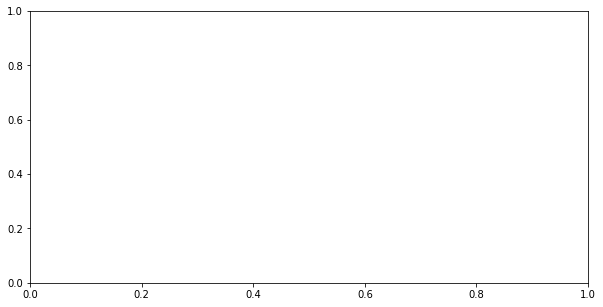

In [32]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

datos = pd.DataFrame(raw_data, columns = ['tipo', 'train_score', 'test_score'])

# Setting the positions and width for the bars
pos = list(range(len(datos['train_score']))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        datos['pre_score'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=datos['first_name'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        datos['mid_score'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=datos['first_name'][1]) 


# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Test Subject Scores')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(datos['first_name'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(datos['pre_score'] + datos['mid_score'])] )

# Adding the legend and showing the plot
plt.legend(['Pre Score', 'Mid Score'], loc='upper left')
plt.grid()
plt.show()

### 3.g)